In [ ]:
#Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

#Define path
file_path = r"D:\Coding\Churn Analysis Project\Churn_Analysis_Prediction_Data.xlsx"

#Define sheet to read data from
ChurnDataSheet = 'VW_ChurnData'

#Read the data into a pandas dataframe
data = pd.read_excel(file_path, sheet_name=ChurnDataSheet)

#Display first few rows of the fetched data to see that it was loaded correctly
print(data.head())

  Customer_ID  Gender  Age  Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     True  Madhya Pradesh                    0   
1   11114-PUN    Male   51    False          Punjab                    5   
2   11167-WES  Female   43     True     West Bengal                    3   
3   11179-MAH    Male   35    False     Maharashtra                   10   
4   11180-TAM    Male   75     True      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal  Phone_Service  Multiple_Lines  ...  \
0                31     Deal 1           True           False  ...   
1                 9     Deal 5           True           False  ...   
2                28     Deal 1           True            True  ...   
3                12        NaN           True           False  ...   
4                27     Deal 2           True           False  ...   

    Payment_Method Monthly_Charge  Total_Charges  Total_Refunds  \
0  Bank Withdrawal      95.099998    6683.399902       

In [3]:
#Data processing
#Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status' because data encoder uses alphabetical order to encode
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Confusion Matrix:
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



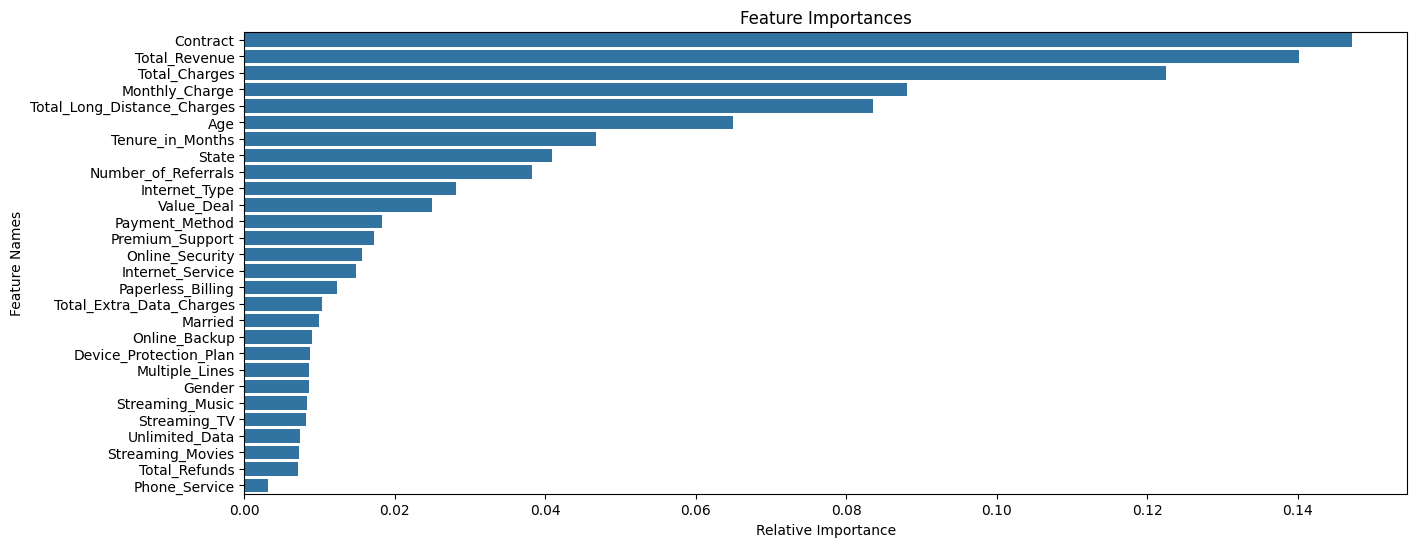

In [4]:
#Train random forest model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [5]:
#Use model for prediction on new data
# Define the path to the Joiner Data Excel file
file_path = r"D:\Coding\Churn Analysis Project\Churn_Analysis_Prediction_Data.xlsx"

JoinDataSheet = 'VW_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=JoinDataSheet)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"D:\Coding\Churn Analysis Project\Churn_Analysis_Predictions.csv", index=False)

  Customer_ID  Gender  Age  Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18    False   Tamil Nadu                    5   
1   12056-WES    Male   27    False  West Bengal                    2   
2   12136-RAJ  Female   25     True    Rajasthan                    2   
3   12257-ASS  Female   39    False        Assam                    9   
4   12340-DEL  Female   51     True        Delhi                    0   

   Tenure_in_Months Value_Deal  Phone_Service  Multiple_Lines  ...  \
0                 7     Deal 5          False           False  ...   
1                20        NaN           True           False  ...   
2                35        NaN           True           False  ...   
3                 1        NaN           True           False  ...   
4                10        NaN           True           False  ...   

    Payment_Method Monthly_Charge  Total_Charges  Total_Refunds  \
0     Mailed Check      24.299999      38.450001            0.0   
1  Ban